## Multiclass Image classification using Convolutional Neural Network for Plant disease Identification

- In this project I have used dataset of Tomato leaf images from kaggle.
- This dataset contains 17943 training images and 4487 test images, which are classified in 10 categories
- To train this model I have used Convolutional neral network
- With CNN I have achieved 91% training accuracy in image classification
- After training and validation of model I have predicted the results for new images directly from Google.

## 1. Importing training and test dataset

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten 

**1.1 Image data Augmentation for training data using ImageDataGenerator**

In [29]:
training_Datagenerator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

**1.2 Importing Training dataset with target size of 68*68**

In [30]:
train_set = training_Datagenerator.flow_from_directory('plant_Diseases_data/train', 
                                                       atarget_size=(68, 68),batch_size=32,class_mode='categorical')

Found 17943 images belonging to 10 classes.


In [31]:
testdata_generator = ImageDataGenerator(rescale=1./255)

**1.3 Importing test dataset with target size of 68*68**

In [32]:
test_set = testdata_generator.flow_from_directory('plant_Diseases_data/test', target_size=(68, 68),
        batch_size=32,
        class_mode='categorical')

Found 4487 images belonging to 10 classes.


## 2. Building the model

**2.1 Importing Sequential class from keras to initialize the model**

In [33]:
from tensorflow.keras.models import Sequential
model = Sequential()

**2.2 Adding convolutional layer with 50 filter maps, with 3*3 matrix**

In [34]:
model.add(Conv2D(filters = 50, kernel_size = 3, padding='valid',activation='relu', input_shape=[68, 68, 3]))

**2.3 Pooling with 2*2 matrix and 1 stride**

In [35]:
model.add(MaxPool2D(pool_size=(2, 2), strides=1, padding='valid'))

**2.4 Flattening**

In [36]:
model.add(Flatten())

**2.5 Full connection**

In [37]:
model.add(Dense(units= 120,activation='relu'))
model.add(Dense(units= 120,activation='relu'))

**2.6 FInal output layer**

In [38]:
model.add(Dense(units= 10,activation='softmax'))

## 3. Model Training

**3.1 Compiling the model**

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**3.2 Training the CNN on the Training set and evaluating it on the Test set**

In [40]:
model.fit(x=train_set,
    batch_size=16,
    epochs=10,
    validation_data=test_set)

Epoch 1/10
561/561 [==============================] - 773s 1s/step - loss: 1.1798 - accuracy: 0.6238 - val_loss: 0.8247 - val_accuracy: 0.7243
Epoch 2/10
561/561 [==============================] - 585s 1s/step - loss: 0.5908 - accuracy: 0.7962 - val_loss: 0.9783 - val_accuracy: 0.6878
Epoch 3/10
561/561 [==============================] - 606s 1s/step - loss: 0.4554 - accuracy: 0.8449 - val_loss: 0.6433 - val_accuracy: 0.7832
Epoch 4/10
561/561 [==============================] - 541s 965ms/step - loss: 0.4033 - accuracy: 0.8621 - val_loss: 0.5074 - val_accuracy: 0.8355
Epoch 5/10
561/561 [==============================] - 515s 917ms/step - loss: 0.3489 - accuracy: 0.8792 - val_loss: 0.7483 - val_accuracy: 0.7782
Epoch 6/10
561/561 [==============================] - 399s 710ms/step - loss: 0.3247 - accuracy: 0.8882 - val_loss: 1.2131 - val_accuracy: 0.6969
Epoch 7/10
561/561 [==============================] - 402s 717ms/step - loss: 0.3135 - accuracy: 0.8905 - val_loss: 0.6942 - val_accu

**Achieved 91% training accuracy and 83% validation accuracy**

## 4. Saving the model

In [41]:
model.save('Diease_predictotor')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Diease_predictotor\assets


## 5. Loading the saved model to predict the class for new images

**5.1 Imprting load_model object for loading the saved model** 

In [48]:
from tensorflow.keras.models import load_model

In [49]:
saved_model = load_model('Diease_predictotor')

**5.2 Importing new images using load_img object for classification, Importing image of healthy leaf**

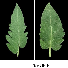

In [81]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('newdata/data/test6.png', target_size = (68, 68))
test_image

In [82]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = saved_model.predict(test_image)
new_prediction = np.argmax(result,axis=1)

In [83]:
if new_prediction[0] == 0:
    print('leaf has Bacterial spots')
    
elif new_prediction[0] == 1:
    print('This leaf has Early blight')
    
elif new_prediction[0] == 2:
    print('This leaf has late blight')
    
elif new_prediction[0] == 3:
    print('This leaf has mold')
    
elif new_prediction[0] == 4:
    print('This leaf has Septoria spots')
    
elif new_prediction[0] == 5:
    print('This leaf has Two-spotted_spider_mite')
    
elif new_prediction[0] == 6:
    print('This leaf has Target_Spot')
    
elif new_prediction[0] == 7:
    print('This leaf has Curl_Virus')
    
elif new_prediction[0] == 8:
    print('This leaf has mosaic_virus')
    
elif new_prediction[0] == 9:
    print('This leaf is Healthy')

This leaf is Healthy


**5.3 Importing Image of leaf with Septoria spots**

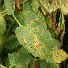

In [84]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('newdata/data/test1.jpg', target_size = (68, 68))
test_image

In [85]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = saved_model.predict(test_image)
new_prediction = np.argmax(result,axis=1)

In [86]:
if new_prediction[0] == 0:
    print('leaf has Bacterial spots')
    
elif new_prediction[0] == 1:
    print('This leaf has Early blight')
    
elif new_prediction[0] == 2:
    print('This leaf has late blight')
    
elif new_prediction[0] == 3:
    print('This leaf has mold')
    
elif new_prediction[0] == 4:
    print('This leaf has Septoria spots')
    
elif new_prediction[0] == 5:
    print('This leaf has Two-spotted_spider_mite')
    
elif new_prediction[0] == 6:
    print('This leaf has Target_Spot')
    
elif new_prediction[0] == 7:
    print('This leaf has Curl_Virus')
    
elif new_prediction[0] == 8:
    print('This leaf has mosaic_virus')
    
elif new_prediction[0] == 9:
    print('This leaf is Healthy')

This leaf has Septoria spots


**5.4 Importing Image of leaf with late blight**

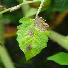

In [87]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('newdata/data/test2.jpg', target_size = (68, 68))
test_image


In [88]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = saved_model.predict(test_image)
new_prediction = np.argmax(result,axis=1)

In [89]:
if new_prediction[0] == 0:
    print('leaf has Bacterial spots')
    
elif new_prediction[0] == 1:
    print('This leaf has Early blight')
    
elif new_prediction[0] == 2:
    print('This leaf has late blight')
    
elif new_prediction[0] == 3:
    print('This leaf has mold')
    
elif new_prediction[0] == 4:
    print('This leaf has Septoria spots')
    
elif new_prediction[0] == 5:
    print('This leaf has Two-spotted_spider_mite')
    
elif new_prediction[0] == 6:
    print('This leaf has Target_Spot')
    
elif new_prediction[0] == 7:
    print('This leaf has Curl_Virus')
    
elif new_prediction[0] == 8:
    print('This leaf has mosaic_virus')
    
elif new_prediction[0] == 9:
    print('This leaf is Healthy')

This leaf has late blight
